In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
%matplotlib inline 

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [ ]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [ ]:
np.random.seed(9876789)

In [ ]:
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x**2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)

In [ ]:
X = sm.add_constant(X)
y = np.dot(X, beta) + e

In [ ]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

In [ ]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

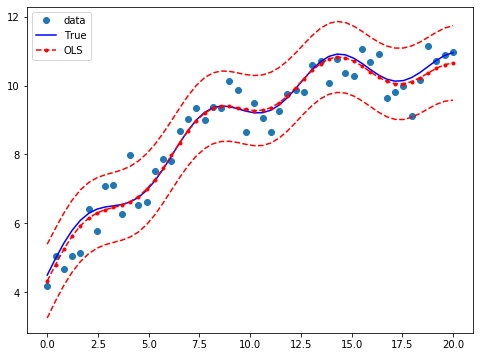

In [17]:
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x - 5)**2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.]

y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

res = sm.OLS(y, X).fit()

prstd, iv_l, iv_u = wls_prediction_std(res)

fig, ax = plt.subplots(figsize=(8, 6))

_ = ax.plot(x, y, 'o', label="data")
_ = ax.plot(x, y_true, 'b-', label="True")
_ = ax.plot(x, res.fittedvalues, 'r--.', label="OLS")
_ = ax.plot(x, iv_u, 'r--')
_ = ax.plot(x, iv_l, 'r--')
_ = ax.legend(loc='best')

In [ ]:
if __name__ == '__main__':
    x = np.arange(0,20,1)
    y = x*10 + 2
    y[1] = 6
    # coef 为系数，poly_fit 拟合函数
    #一阶拟合
    coef1 = np.polyfit(x, y, 1)
    poly_fit1 = np.poly1d(coef1)
    print(poly_fit1)
    #二阶拟合
    coef2 = np.polyfit(x, y, 2)
    poly_fit2 = np.poly1d(coef2)
    print(poly_fit2)
    #三阶拟合
    coef3 = np.polyfit(x, y, 3)
    poly_fit3 = np.poly1d(coef3)
    print(poly_fit3)
    #四阶拟合
    coef4 = np.polyfit(x, y, 4)
    poly_fit4 = np.poly1d(coef4)
    print(poly_fit4)

In [ ]:
from minepy import MINE
import time

In [ ]:
#返回值在0-1之间，越大，相关性越高
def MIC(x,y):
    m = MINE()
    m.compute_score(x,y)
    return m.mic()

if __name__ == '__main__':
    x = pd.Series(np.arange(0,20000,2))
    y = pd.Series(np.random.randint(1,20000,10000))
    data_x_y = pd.DataFrame({'x': x,
                         'y': y,})
    start = time.clock()
    print('MIC:    ',MIC(x,y))
    print('mic_time:    ',time.clock() - start)

    start = time.clock()
    print('Pearson:', data_x_y.corr('pearson').iloc[0,1])   #[0,1]是x和y2的相关系数
    print('Pearson_time:', time.clock() - start)

    start = time.clock()
    print('kendall:', data_x_y.corr('kendall').iloc[0,1])   #[0,1]是x和y2的相关系数
    print('kendall_time:', time.clock() - start)

    start = time.clock()
    print('spearman:', data_x_y.corr('spearman').iloc[0,1])   #[0,1]是x和y2的相关系数
    print('spearman_time:', time.clock() - start)

    #mic方法耗时最长spearman方法耗时最短，pearson kendall spearman得到的结果差不多

In [ ]:
start_time = pd.date_range(start='2020-1-1 00:00:00',
                           end='2020-2-4 00:00:00',
                           periods=200)  #秒后面有小数

start_time = [(i.day, i.hour, i.minute)for i in start_time]

In [ ]:
temp = np.arange(1,51,1)
temp = temp+temp*temp
temp 
temp = np.append(temp,temp)
temp = np.append(temp,temp)
execution_time = pd.Series(temp,index=start_time)
df = pd.DataFrame({'start_time': execution_time.index, 'execution_time': execution_time.values})
df

In [ ]:
np.log(10)
np.log10(10)
np.log2(4)

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.tsa.stattools as ts

In [ ]:
# Dickey-Fuller test:判断时序数据稳定性，
def teststationarity(ts):
    dftest = adfuller(ts)
    # 对上述函数求得的值进行语义描述
    dfoutput = pd.Series(dftest[0:4],
                         index=[
                             'Test Statistic', 'p-value', '#Lags Used',
                             'Number of Observations Used'
                         ])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    return dfoutput


def arima_model(execution_time):
    print('teststationarity(execution_time):\n',
          teststationarity(execution_time))
    # 对数变换
    et_log = np.log(execution_time)
    #print('teststationarity(et_log):\n', teststationarity(et_log))

    order = ts.arma_order_select_ic(
        et_log, max_ar=5, max_ma=5,
        ic='bic').bic_min_order  # 定阶eg. order=(1,0) => p=1,q=0
    
    if order == (0, 0):
        order = (1, 1)
    # 这里order的格式是(p,d,q)，没有进行差分d=0
    
    et_ARIMA = ARIMA(et_log, order=(order[0], 0, order[1])).fit()

    print('summary:\n', et_ARIMA.summary())  # 模型的详细信息

    predict = np.exp(et_ARIMA.fittedvalues)  # 对数还原

    # print(et_ARIMA.fittedvalues)
    forecast_log = et_ARIMA.forecast()[0]  # 这个是预测的下一时刻的一个值
    forecast = np.exp(forecast_log)  # 对数还原

    plt.plot(execution_time, marker='.', c='g', label="actual")
    plt.plot(predict, marker='.', c='r', label="predicted")
    plt.xticks(x, rotation='vertical')
    plt.legend()
    plt.show()

    return forecast


def generate_data():
    #产生200个周期性数据（50个为一个周期）
    #秒后面有小数
    start_time = pd.date_range(start='2020-1-1',
                               end='2020-1-30',
                               periods=60)
    #start_time = pd.date_range(start='2020-1-1 00:00:00',periods=200,freq='120S')
    #秒后面没有小数
    temp = np.arange(1, 31, 1)
    temp = temp + temp * temp
    temp = np.append(temp, temp)
    #temp = np.append(temp,temp)
    execution_time = pd.Series(temp, index= ['-'.join(list(map(str, [i.day, i.hour]))) for i in start_time])
    df = pd.DataFrame({
        'start_time': execution_time.index,
        'execution_time': execution_time.values
    })
    df.to_csv('ARIMATestData.csv', index=None)


if __name__ == '__main__':
    generate_data()
    execution_time = pd.read_csv('ARIMATestData.csv',
                                 index_col='start_time')['execution_time']
    forecast = arima_model(execution_time)
    print('forecast execution time = ', forecast)

In [ ]:
'-'.join(list(map(str, [1,2])))

In [ ]:
pd.to_datetime(['2018-01-05', '7/8/1952', 'Oct 10, 1995'])

In [ ]:
pd.to_datetime('2018-01-15 3:45pm')
pd.to_datetime('2018-01-15 3:45am')`
pd.to_datetime('1/11/2018 3:45pm', dayfirst= True)
pd.to_datetime('13/11/2018 3:45pm',dayfirst= True)  
pd.to_datetime('11/13/2018 3:45pm',dayfirst= True)#?
pd.to_datetime('2018 Feb 2 3:45pm')